In [483]:
import os

In [484]:
from google.colab import drive

In [485]:
os.getcwd()

'/content'

In [486]:
from google.colab import files
files.upload()

Saving water_quality.csv to water_quality (8).csv


{'water_quality.csv': b'ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability\r\n,204.8904554713363,20791.318980747026,7.300211873184757,368.51644134980336,564.3086541722439,10.3797830780847,86.9909704615088,2.9631353806316407,0\r\n3.71608007538699,129.42292051494425,18630.057857970347,6.635245883862,,592.8853591348523,15.180013116357259,56.32907628451764,4.500656274942408,0\r\n8.099124189298397,224.23625939355776,19909.541732292393,9.275883602694089,,418.6062130644815,16.868636929550973,66.42009251176368,3.0559337496641685,0\r\n8.316765884214679,214.37339408562252,22018.417440775294,8.05933237743854,356.88613564305666,363.2665161642437,18.436524495493302,100.34167436508008,4.628770536837084,0\r\n9.092223456290965,181.10150923612525,17978.98633892625,6.546599974207941,310.13573752420444,398.41081338184466,11.558279443446395,31.997992727424737,4.075075425430034,0\r\n5.584086638456089,188.3133237696164,28748.68773904612,7.54486878877965,3

In [487]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import xgboost as xgb

In [488]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [489]:
training = pd.read_csv('water_quality.csv')

In [490]:
df=training.copy()

In [491]:
training=df

In [492]:
training.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [493]:
training.shape

(3276, 10)

In [494]:
training.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [425]:
training.describe

<bound method NDFrame.describe of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

In [426]:
training.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [427]:
training['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

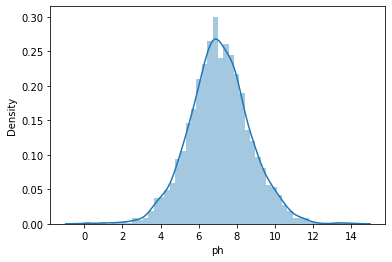

In [428]:
sns.distplot(training['ph'],bins=50)

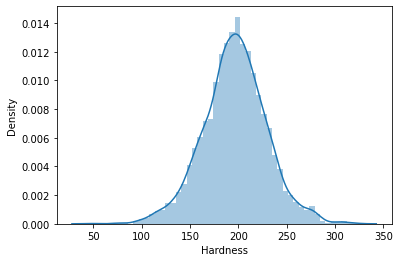

In [429]:
plot_Hardness = sns.distplot(training['Hardness'],bins=50)

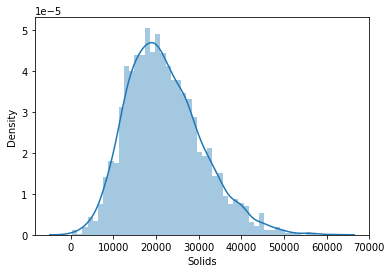

In [430]:
plot_Solids   = sns.distplot(training['Solids'],bins=50)

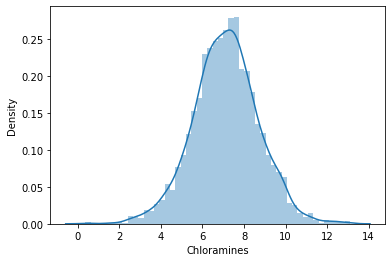

In [349]:
plot_Chloramines = sns.distplot(training['Chloramines'],bins=50)

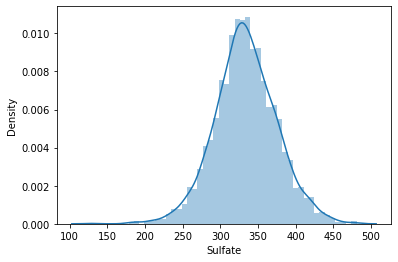

In [350]:
plot_Sulfate = sns.distplot(training['Sulfate'],bins=50)

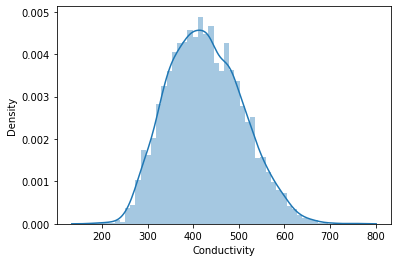

In [351]:
plot_Conductivity = sns.distplot(training['Conductivity'],bins=50)

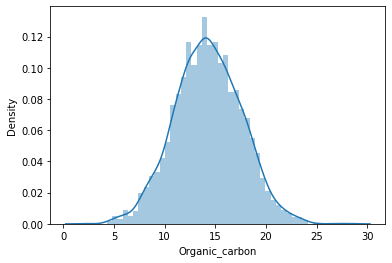

In [352]:
plot_Organic_carbon = sns.distplot(training['Organic_carbon'],bins=50)

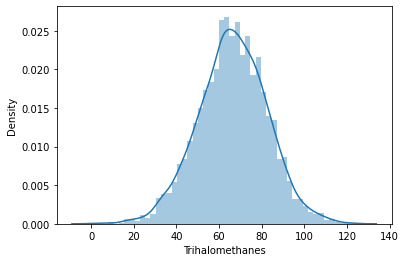

In [353]:
plot_Trihalomethanes= sns.distplot(training['Trihalomethanes'],bins=50)

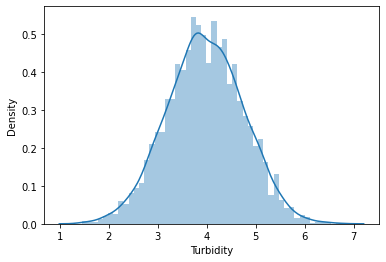

In [354]:
plot_Turbidity = sns.distplot(training['Turbidity'],bins=50)

MISSING VALUE ANALYSIS

In [355]:
###### MISSING VALUE ANALYSIS

In [495]:
mising_value = pd.DataFrame(training.isnull().sum())

In [496]:
mising_value

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [497]:
mising_value = mising_value.rename(columns = {'index': 'Variable', 0: 'Missing_percentage'})
mising_value['Missing_percentage'] = (mising_value['Missing_percentage']/len(training))*100

In [498]:
mising_value

,Missing_percentage
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [499]:
training['ph']=training['ph'].fillna(training['ph'].mean())

In [500]:
training['Sulfate']=training['Sulfate'].fillna(training['Sulfate'].mean())

In [501]:
training['Trihalomethanes']=training['Trihalomethanes'].fillna(training['Trihalomethanes'].mean())

In [367]:
training['Sulfate'].loc[1000]

343.92522231141317

In [368]:
training['Sulfate'].loc[1000]=np.nan

In [369]:
training['Sulfate'].loc[1000]

nan

In [370]:
print('Value if imputed with mean:{}'.format(training['Sulfate'].fillna(training['Sulfate'].mean()).loc[1000]))

Value if imputed with mean:333.7726775434251


In [371]:
training['Trihalomethanes'].loc[1000]

35.29618141853637

In [372]:
training['Trihalomethanes'].loc[1000]=np.nan

In [373]:
training['Trihalomethanes'].loc[1000]

nan

In [374]:
print('Value if imputed with mean:{}'.format(training['Trihalomethanes'].fillna(training['Trihalomethanes'].mean()).loc[1000]))

Value if imputed with mean:66.4057891640285


In [502]:
mising_value1 = pd.DataFrame(training.isnull().sum())

In [503]:
mising_value1

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [377]:
###### NO Missing Values found

In [378]:
##### OUTLIER ANALYSIS

OUTLIER ANALYSIS


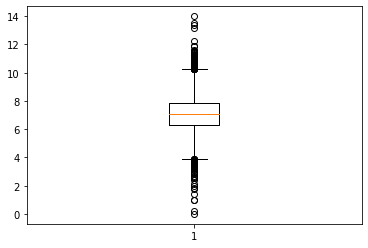

In [379]:
out_ph=plt.boxplot(training['ph'])

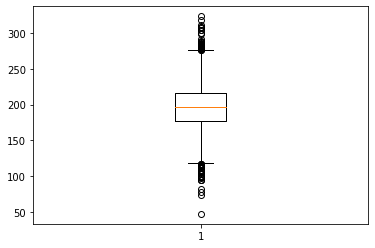

In [380]:
out_Hardness=plt.boxplot(training['Hardness'])

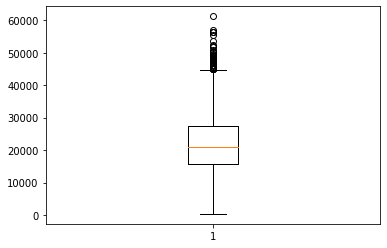

In [381]:
out_Solids=plt.boxplot(training['Solids'])

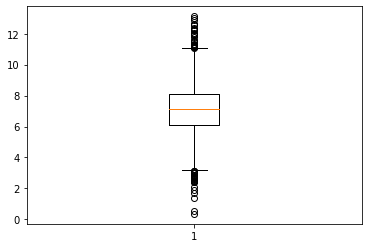

In [382]:
out_Chloramines=plt.boxplot(training['Chloramines'])

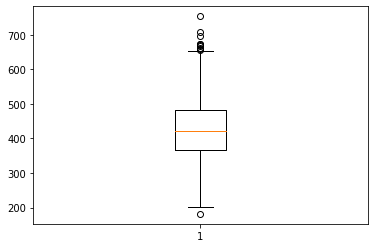

In [383]:
out_Conductivity=plt.boxplot(training['Conductivity'])

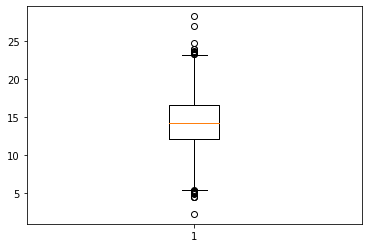

In [384]:
out_Organic_carbon=plt.boxplot(training['Organic_carbon'])

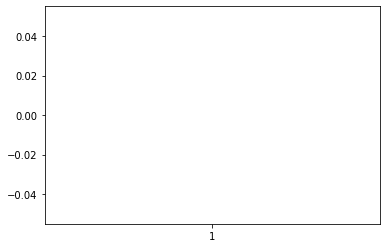

In [385]:
out_Trihalomethanes=plt.boxplot(training['Trihalomethanes'])

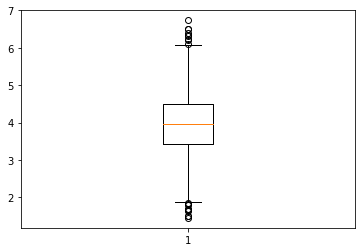

In [386]:
out_Turbidity=plt.boxplot(training['Turbidity'])

In [504]:
col_names=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [505]:
col_names

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

DETERMINATION OF INTERQUARTILE RANGE (iqr)

In [506]:
def outlier_analysis(col_names):
    print(col_names)
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(training[col_names], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    training.loc[training[col_names] < minimum,col_names] = np.nan
    training.loc[training[col_names] > maximum,col_names] = np.nan

In [507]:
outlier_analysis('Hardness')

Hardness
216.66745621487073 176.85053787752437
117.12516037150485 276.3928337208903


In [508]:
outlier_analysis('ph')

ph
7.870049755247177 6.277672635884397
3.8891069568402266 10.258615434291347


In [392]:
training

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,NaN,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [509]:
mising_value = pd.DataFrame(training.isnull().sum())

In [510]:
mising_value

,0
ph,142
Hardness,83
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [511]:
training['ph']=training['ph'].fillna(training['ph'].mean())

In [512]:
training['Hardness']=training['Hardness'].fillna(training['Hardness'].mean())

In [513]:
training['Sulfate']=training['Sulfate'].fillna(training['Sulfate'].mean())

In [514]:
training['Trihalomethanes']=training['Trihalomethanes'].fillna(training['Trihalomethanes'].mean())

In [515]:
mising_value = pd.DataFrame(training.isnull().sum())

In [516]:
mising_value

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [517]:
df_corr = training.loc[:,col_names]

In [448]:
df_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


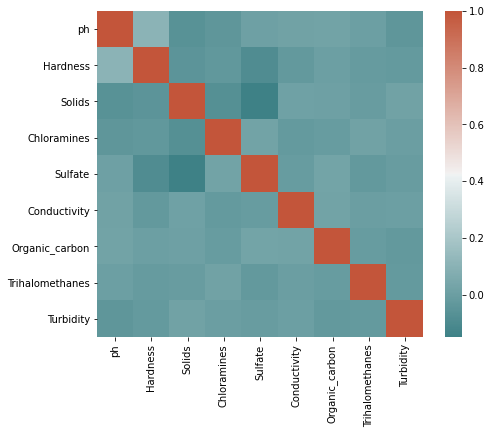

In [518]:
#Set the width and hieght of the plot
fun, ax = plt.subplots(figsize=(8, 6))

#Generate correlation matrix
cor_mat = df_corr.corr()

#Plot using seaborn library
sns.heatmap(cor_mat, mask=np.zeros_like(cor_mat, dtype=np.bool), cmap=sns.diverging_palette(200, 20, as_cmap=True),
            square=True, ax=ax)

In [404]:
#training = training.drop(['BMI','SkinThickness'], axis=1)

In [519]:
col_names=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

feature sampling

In [520]:
for i in col_names:
    print(i)
    training[i] = (training[i] - min(training[i]))/(max(training[i]) - min(training[i]))

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


LOGISTIC REGRESSION

In [521]:
Sample_Index = np.random.rand(len(training)) < 0.8

train = training [Sample_Index]
test = training [~Sample_Index]

In [522]:
train_cols = training.columns[1:9]

In [523]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(training['Potability'], training[train_cols]).fit()


Optimization terminated successfully.
         Current function value: 0.667317
         Iterations 4


In [524]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

In [525]:
#Build confusion matrix
CM = pd.crosstab(test['Potability'],test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


ACCURACY LOGISTIC REGRESSION

In [526]:
((TP+TN)*100)/(TP+TN+FP+FN)


63.72093023255814

FNR LOGISTIC REGRESSION![alt text](https://)

In [527]:
(FN*100)/(FN+TP)

100.0

In [528]:
%matplotlib inline  

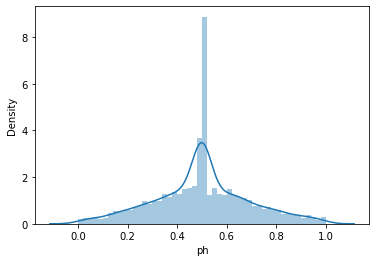

In [529]:
sns.distplot(training['ph'],bins=50)

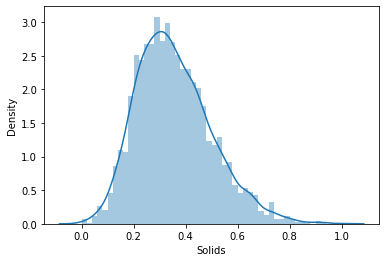

In [530]:
sns.distplot(training['Solids'],bins=50)

In [531]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [532]:
df=training.copy()

In [533]:
training=df.copy()

In [534]:
X = training.values[:, 0:9]
Y = training.values[:,9]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

DECISION TREE

In [535]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)


In [536]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


ACCURACY DECISION TREE

In [537]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

55.03048780487805

FNR DECISION TREE

In [538]:
(FN*100)/(FN+TP)

59.375

KNN CLASSIFIER

In [539]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [540]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [541]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


Accuracy knn classifier

In [542]:
((TP+TN)*100)/(TP+TN+FP+FN)

63.56707317073171

FNR knn classifier

In [543]:
(FN*100)/(FN+TP)

66.40625

NAIVE BAYES

In [544]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [545]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [546]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100





ACCURACY ( BAYES)


In [547]:
((TP+TN)*100)/(TP+TN+FP+FN)

63.71951219512195

FNR(BAYES)


RANDOM FOREST

In [548]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)

In [549]:
RF_Predictions = RF_model.predict(X_test)

In [550]:
#build confusion matrix
from sklearn.metrics import confusion_matrix 
 #CM = confusion_matrix(y_test, y_pred)
CM =pd.crosstab(y_test,RF_Predictions)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]




In [551]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

66.15853658536585

In [552]:
#FNR
(FN*100)/(FN+TP)

67.578125